# NLP Assignment-1 

## Amazon review on the product of mobile electronics 

### Used the data from Tensorflow data sets - amazon_us_reviews 

### Description- This Dataset contains review on one language 'english' and it has been extracted from the market of 'US'

# <span style="color:blue">1)Loading the data set and removing the columns un-related to project </span>

In [1]:
# Necessary library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk import word_tokenize
from nltk import sent_tokenize
import spacy
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/Users/shreyanair/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/Users/shreyanair/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/shreyanair/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/linear_model/least_ang

In [2]:
nlp = spacy.load("en_core_web_sm", disable=["tagger", "ner", "parser"])


In [3]:
df = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.csv',on_bad_lines='warn')
df_2 = df.copy() # Visualization df only used for visualizing insights from all columns

df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


# 2)Reading the dataset with information

In [4]:
df.shape

(104854, 15)

In [5]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          2
helpful_votes        2
total_votes          2
vine                 2
verified_purchase    2
review_headline      4
review_body          3
review_date          2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104854 entries, 0 to 104853
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        104854 non-null  object 
 1   customer_id        104854 non-null  int64  
 2   review_id          104854 non-null  object 
 3   product_id         104854 non-null  object 
 4   product_parent     104854 non-null  int64  
 5   product_title      104854 non-null  object 
 6   product_category   104854 non-null  object 
 7   star_rating        104852 non-null  float64
 8   helpful_votes      104852 non-null  float64
 9   total_votes        104852 non-null  float64
 10  vine               104852 non-null  object 
 11  verified_purchase  104852 non-null  object 
 12  review_headline    104850 non-null  object 
 13  review_body        104851 non-null  object 
 14  review_date        104852 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1

# 3) Data Wrangling

## 3.1)Distribution of values in columns

<AxesSubplot:>

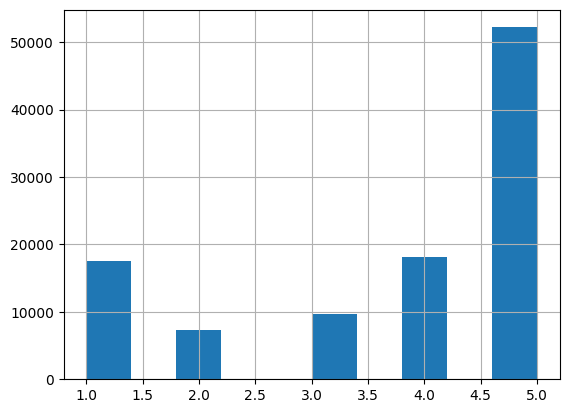

In [7]:
df['star_rating'].hist()

<AxesSubplot:>

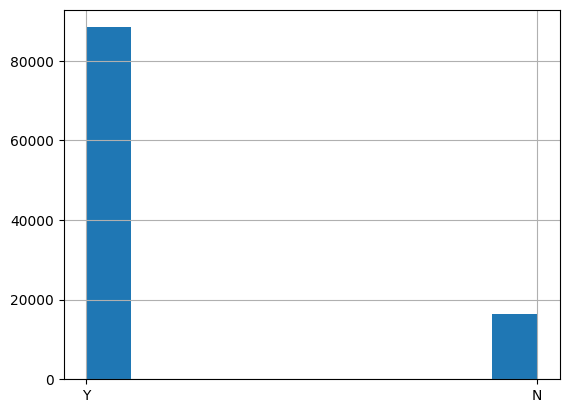

In [8]:
#if it is not a verified one, it can be biased. has to remove those review under some conditions
df['verified_purchase'].hist()

In [9]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


## 3.2)since we have small number of null values we decided to omit the null values

In [11]:
#missing values dropping
df.dropna(subset=['star_rating', 'review_body', 'review_headline'], inplace=True, axis=0)
df_2.dropna(subset=['star_rating', 'review_body','review_headline'], inplace=True, axis=0)

In [12]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

## 3.2)merging the review_headline and review_body as the full_review


In [13]:
#merging the review_headline and review_body as the full_review. the reason for this is as both column will have insight for the model

In [14]:
df["full_review"] = df["review_headline"]+" " +df["review_body"]

In [15]:
df['full_review']

0         Very Happy! As advertised. Everything works pe...
1                                      five star it's great
2         great cables These work great and fit my life ...
3         Work very well but couldn't get used to not he...
4         Cameras has battery issues Be careful with the...
                                ...                        
104849    The Cat Barf is Gone! I've been looking for a ...
104850    Well worth [it] We live in an apartment with h...
104851    Its a Time saver!!! I received this for a birt...
104852    Got Stains? I got the Dirt Devil Spot Scrubber...
104853    no smell has to mean it is getting the job don...
Name: full_review, Length: 104849, dtype: object

## 3.3) Visualizing the distribution with date and min review label

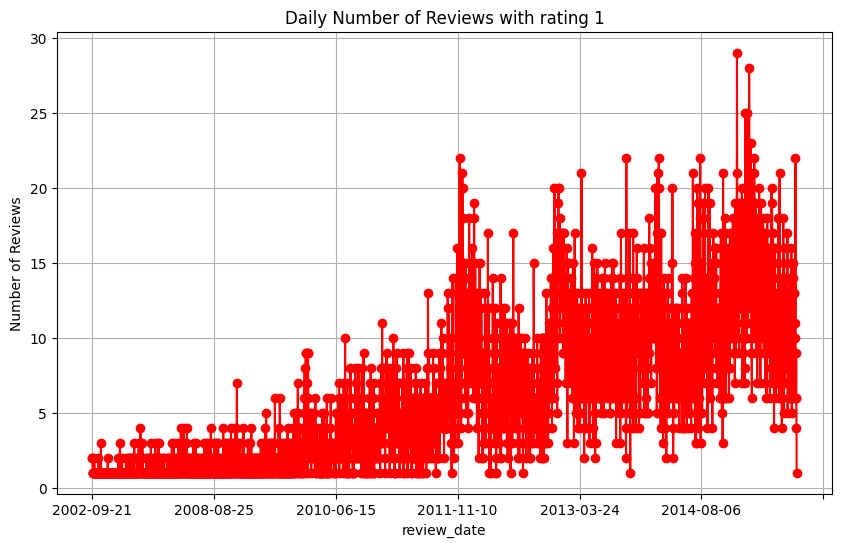

In [16]:
df_1 = df[df['star_rating'] == 1]
# df.head()

# Group by date and count the number of reviews for each day
daily_count = df_1.groupby('review_date').size()

# Plot the daily count
plt.figure(figsize=(10, 6))
daily_count.plot(kind='line', marker='o', linestyle='-', color='r')
plt.title('Daily Number of Reviews with rating 1')
plt.xlabel('review_date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


## 3.3) Subsetting the whole dataset 

In [17]:
df = df[['star_rating','full_review']]

In [18]:
df.head()

,star_rating,full_review
0,5.0,Very Happy! As advertised. Everything works pe...
1,5.0,five star it's great
2,5.0,great cables These work great and fit my life ...
3,4.0,Work very well but couldn't get used to not he...
4,2.0,Cameras has battery issues Be careful with the...


### Setting up label column for training and testing purposes

In [19]:
def label_review(df):
    df['review_label'] = df['star_rating'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Call the function with your DataFrame 'df'
df = label_review(df)

# Call the function with your DataFrame 'df'
df_2 = label_review(df_2)

In [20]:
df.head()

,star_rating,full_review,review_label
0,5.0,Very Happy! As advertised. Everything works pe...,1
1,5.0,five star it's great,1
2,5.0,great cables These work great and fit my life ...,1
3,4.0,Work very well but couldn't get used to not he...,1
4,2.0,Cameras has battery issues Be careful with the...,0


In [21]:
df = df.drop('star_rating',axis = 1)

In [22]:
df = df[:20000]
df_2 = df_2[:20000]

### Final Data frame before text preprocessing 

In [23]:
df.head()
df[df['review_label'] == 0]

,full_review,review_label
4,Cameras has battery issues Be careful with the...,0
5,"It appears to be good, but I'm still waiting f...",0
6,Didn't love the first one First one arrived as...,0
11,"More of a beeper than a buzzer - good part, ba...",0
13,One Star Sucks,0
...,...,...
19984,only for some older devices. Does not work for...,0
19987,picture shows 4 but it's only for 2 Thought it...,0
19988,One Star Won't work with our phones...not supp...,0
19990,The part that plugs into the car is too small ...,0


In [24]:
df.head()

,full_review,review_label
0,Very Happy! As advertised. Everything works pe...,1
1,five star it's great,1
2,great cables These work great and fit my life ...,1
3,Work very well but couldn't get used to not he...,1
4,Cameras has battery issues Be careful with the...,0


In [25]:
df.shape

(20000, 2)

In [26]:
df_2.shape

(20000, 16)

# Text pre-processing

## I.Removing tokenizing, removing stop words, stemming 

In [27]:
from nltk.corpus import stopwords as nltk_stopwords
# Custom list of stopwords for NLTK
custom_stopwords_nltk = set(nltk_stopwords.words('english'))
custom_stopwords_nltk.update(['one', 'two', 'three', 'four', 'five', 'stars'])

In [28]:
# Custom list of stopwords for Spacy
custom_stopwords_spacy = set(nltk_stopwords.words('english'))  # Spacy uses NLTK's list by default
custom_stopwords_spacy.update(['one', 'two', 'three', 'four', 'five', 'stars'])

In [29]:
corpus_nltk=[]
l = len(df)
print(l)
for i in range(l):
    try:
        review = re.sub('[^a-zA-Z]', ' ', df['full_review'][i])
        #print("1 review",review)
    except:
        print("regex")
    review = review.lower()
    #print("1 review",review)
    review = review.split(" ")
    #print("1 review",review)
    review = [word for word in review if not word in custom_stopwords_nltk]
    #print("1 review",review)
    review = ' '.join(review)
    #print("1 review",review)
    corpus_nltk.append(review)

20000


In [30]:
# Tokenizing using Spacy
corpus_spacy = []
for i in range(l):
    try:
        review = re.sub('[^a-zA-Z]', ' ', df['full_review'][i])
    except:
        print("regex")
    review = review.lower()
    doc = nlp(review)
    review = ' '.join([token.text for token in doc if token.text.lower() not in custom_stopwords_spacy])
    corpus_spacy.append(review)

In [31]:
# Displaying the frequency distribution of words in the NLTK corpus
frequency_distribution = FreqDist(corpus_nltk)
print(frequency_distribution)
frequency_distribution.most_common(20)

<FreqDist with 18038 samples and 20000 outcomes>


[('good', 224),
 ('great', 103),
 ('excellent', 89),
 ('works great', 80),
 ('love', 77),
 ('ok', 64),
 ('nice', 53),
 ('works great ', 51),
 ('great product', 43),
 ('good product', 37),
 ('love ', 34),
 ('thanks', 32),
 ('perfect', 31),
 ('awesome', 30),
 ('excelente', 30),
 ('great product ', 28),
 ('works well', 25),
 ('star work', 23),
 ('works', 20),
 ('great ', 19)]

In [32]:
#Displaying the frequency distribution of words in the Spacy corpus
frequency_distribution_spacy = FreqDist(corpus_spacy)
print(frequency_distribution_spacy)
frequency_distribution_spacy.most_common(20)

<FreqDist with 17881 samples and 20000 outcomes>


[('good', 242),
 ('works great', 131),
 ('great', 122),
 ('love', 111),
 ('excellent', 103),
 ('great product', 71),
 ('ok', 64),
 ('nice', 62),
 ('good product', 48),
 ('awesome', 41),
 ('thanks', 39),
 ('perfect', 38),
 ('star work', 33),
 ('excelente', 32),
 ('works well', 32),
 ('works', 26),
 ('expected', 22),
 ('excellent product', 22),
 ('thank', 21),
 ('excelent', 17)]

In [34]:
# Convert NLTK frequency distribution to a DataFrame for Seaborn
df_nltk = pd.DataFrame(list(frequency_distribution.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Convert Spacy frequency distribution to a DataFrame for Seaborn
df_spacy = pd.DataFrame(list(frequency_distribution_spacy.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

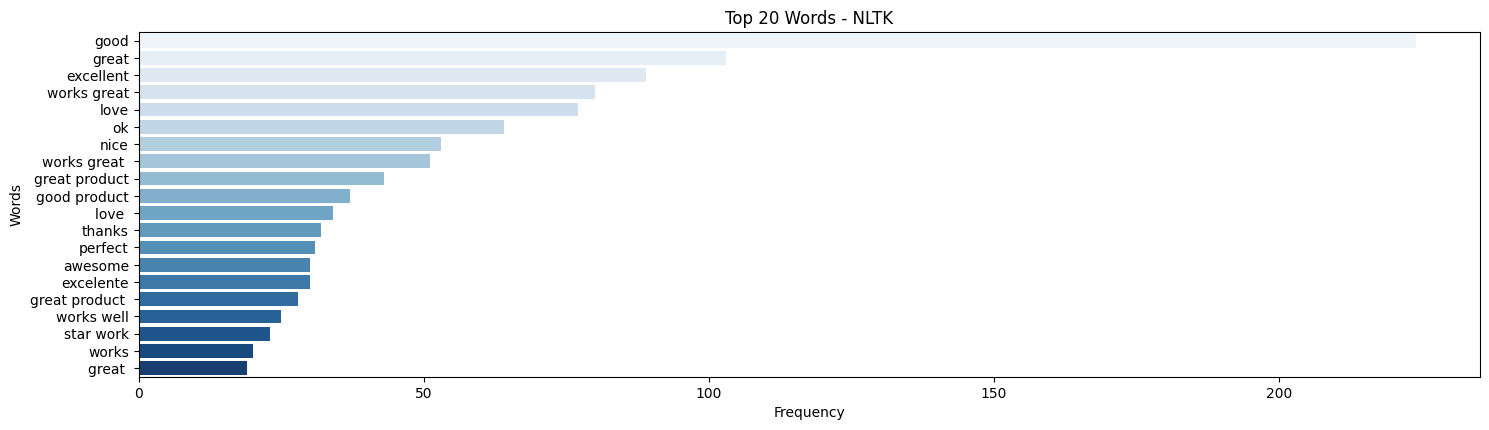

In [35]:
# Plotting horizontal bar plots using Seaborn
plt.figure(figsize=(15, 8))

# NLTK
plt.subplot(2, 1, 1)
sns.barplot(x='Frequency', y='Word', data=df_nltk, palette='Blues')
plt.title('Top 20 Words - NLTK')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

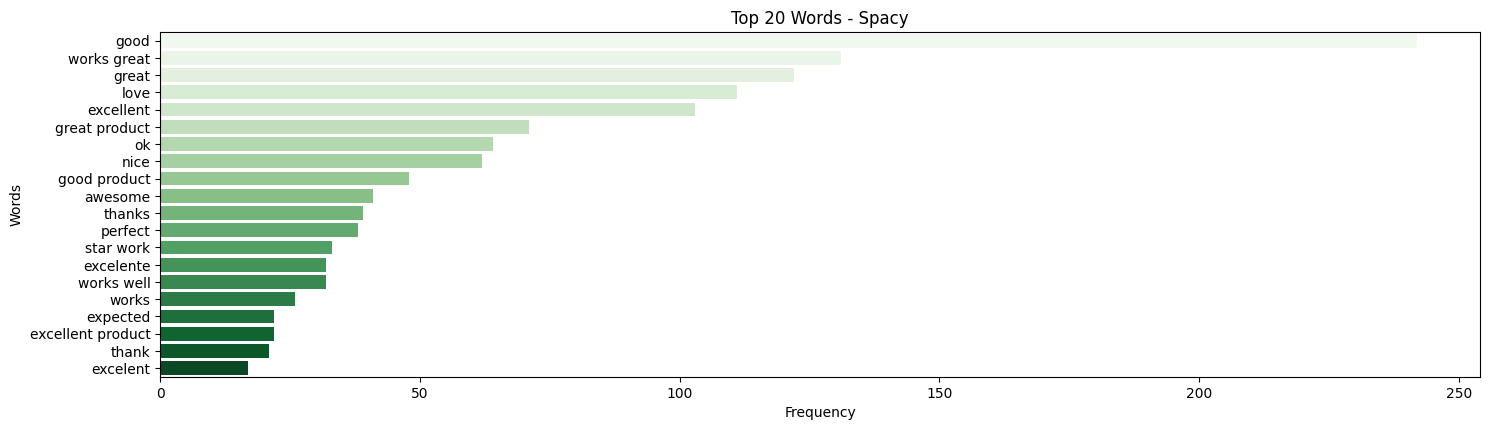

In [36]:
# Spacy
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 2)
sns.barplot(x='Frequency', y='Word', data=df_spacy, palette='Greens')
plt.title('Top 20 Words - Spacy')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

Displaying the Most Frequancy word in the line graph to identify the insight

In [37]:
x =[]
y =[]
for i in frequency_distribution.most_common(20):
    y.append(i[0])
    x.append(i[1])

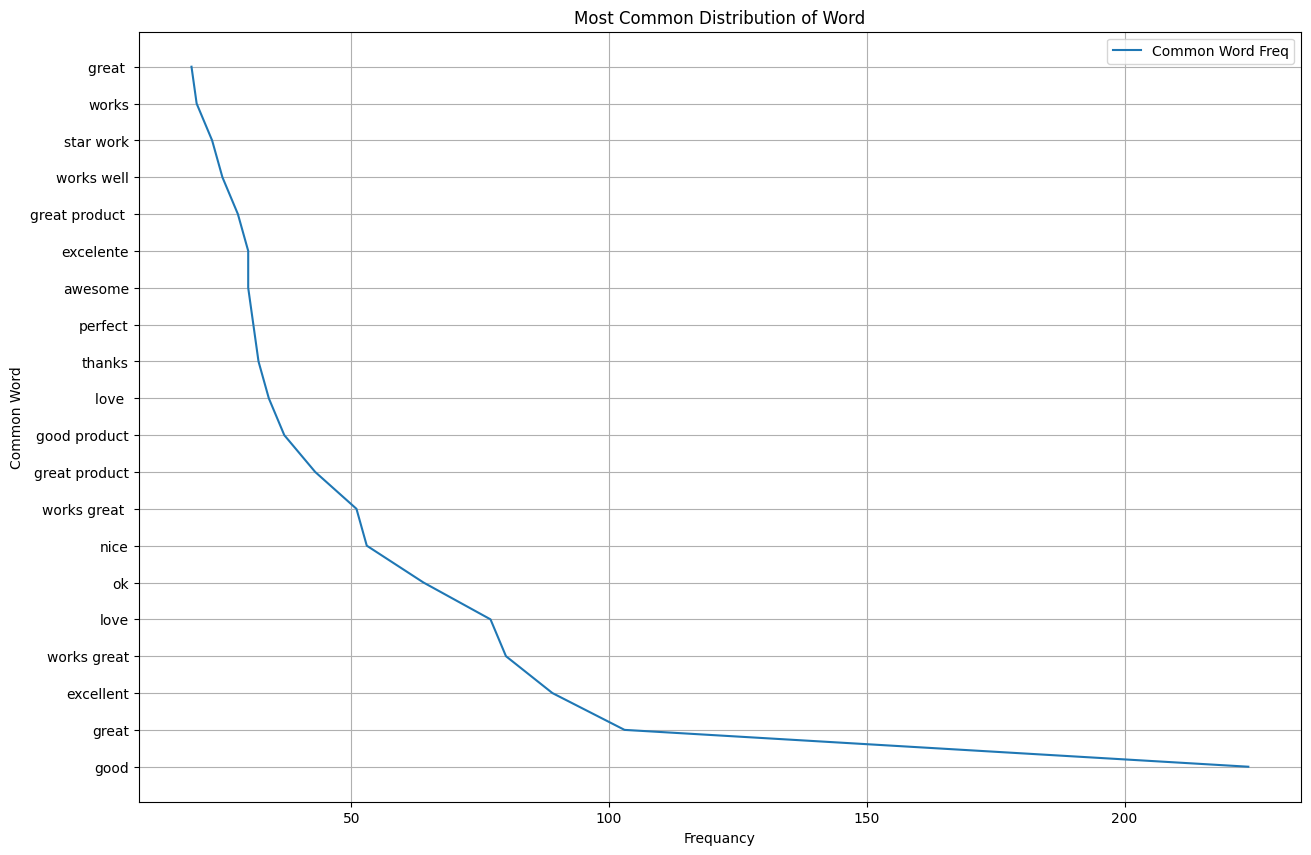

In [38]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(x,y,label='Common Word Freq')
plt.title('Most Common Distribution of Word')
plt.xlabel('Frequancy')
plt.ylabel('Common Word')
plt.legend()
plt.savefig('Frequancy Distribution of Common Word')

### Deriving target variable

In [39]:
# Mapping 0 and 1 to positive and negative labels
df['review_category'] = df['review_label'].map({0: 'negative', 1: 'positive'})
df 

# Mapping 0 and 1 to positive and negative labels
df_2['review_category'] = df_2['review_label'].map({0: 'negative', 1: 'positive'})


In [40]:
df.head()

,full_review,review_label,review_category
0,Very Happy! As advertised. Everything works pe...,1,positive
1,five star it's great,1,positive
2,great cables These work great and fit my life ...,1,positive
3,Work very well but couldn't get used to not he...,1,positive
4,Cameras has battery issues Be careful with the...,0,negative


# II. Visualizing how vectorizers give importances to words

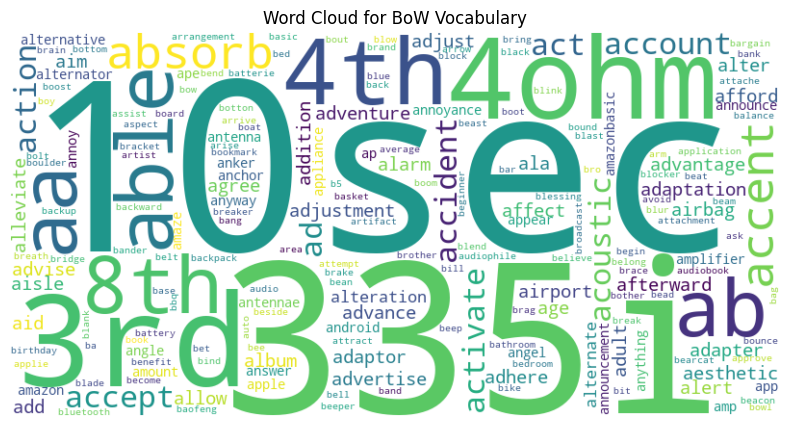

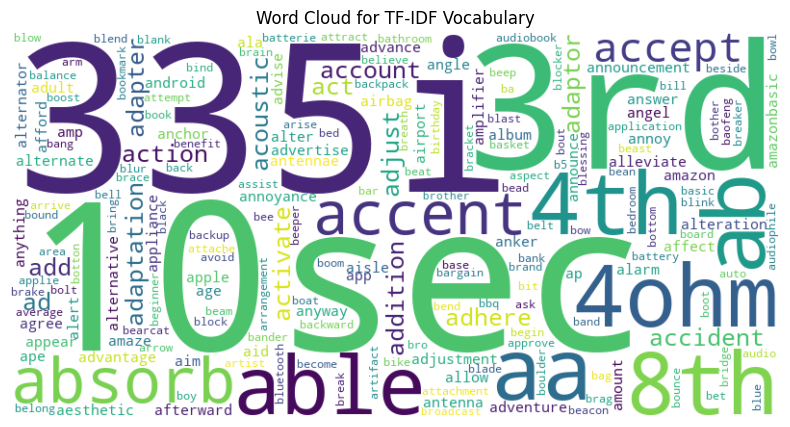

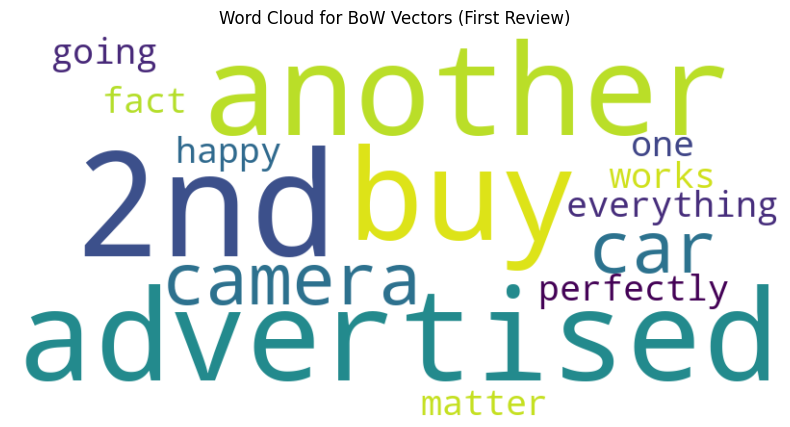

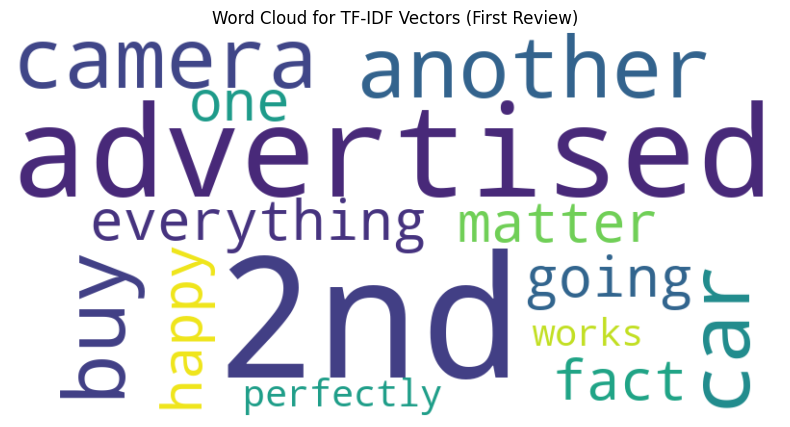

In [41]:

# Assuming df is your DataFrame
# Replace 'text_column' with the actual name of the column containing the textual reviews

# Extract the first review
first_review = df['full_review'].iloc[0]

# Bag of Words (BoW) Vectorizer
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(df['full_review'])
bow_feature_names = bow_vectorizer.get_feature_names()

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['full_review'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# Word Clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word Cloud for BoW vocabulary
plot_word_cloud(' '.join(bow_feature_names), 'Word Cloud for BoW Vocabulary')

# Word Cloud for TF-IDF vocabulary
plot_word_cloud(' '.join(tfidf_feature_names), 'Word Cloud for TF-IDF Vocabulary')

# Word Cloud for BoW vectors of the first review
plot_word_cloud(' '.join([word for word in bow_feature_names if bow_vectors[0, bow_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for BoW Vectors (First Review)')

# Word Cloud for TF-IDF vectors of the first review
plot_word_cloud(' '.join([word for word in tfidf_feature_names if tfidf_vectors[0, tfidf_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for TF-IDF Vectors (First Review)')

# B) Modeling & Performance

# III. Implementation of Vectorization and Models

## Implementing Bag of Words Vectorization and Using Random Forest model

## Model 1(a): Vectorization: Bag of Word<br> Classifier Model: Random Forest

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

data = l

X= df['full_review']
y = df['review_category']


#spliting of dataset size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix BoW & Random Forest')
plt.show()

ImportError: cannot import name 'ConfusionMatrixDisplay' from 'sklearn.metrics' (/Users/shreyanair/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

## Model 1(b): Vectorization: BOW<br> Classifier Model: Naive Bayes

## Implementing Bag of Words Vectorization and Using Naive Bayes model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X= df['full_review']
y = df['review_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix BoW & Naive Bayes')
plt.show()

In [ ]:
classifier.feature_count_

## Implementing Bag of TFid Vectorization and Using Random Forest model

## Model 2(a): Vectorization: tf-idf<br> Classifier Model: Random Forest

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = l

X= df['full_review']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
X_train_vectorized.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
classifier = RandomForestClassifier()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix TF-IDF & Random Forest')
plt.show()

## Top 20 features derived from trained model (Random Forest)

In [ ]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_

features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()


## Implementing Bag of TFid Vectorization and Using Naive Bayes model

## Type2(b): Vectorization: tf-idf<br> Classifier Model: Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X=  df['full_review']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)


X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_vectorized.shape

### Deriving the vocabulary used for building vectors

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix TF-IDF & Naive Bayes')
plt.show()

## Top 20 features derived from trained model (Naive Bayes)

In [ ]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_
features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

# C) Insights

## Top 10 products by reivew count

In [ ]:
import seaborn as sns

# Assuming you have a DataFrame 'df_2' with 'product_title' and 'review_category' columns

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 10 products with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(10).index

# Filter the DataFrame for the top 10 products
top_positive_df = positive_reviews[positive_reviews['product_title'].isin(top_positive_products)]

# Adjust figure size for better visualization
plt.figure(figsize=(15, 8))

# Limit the length of product titles for better visualization
top_positive_df['product_title'] = top_positive_df['product_title'].apply(lambda x: x[:30] + "..." if len(x) > 30 else x)

# Plot a violin plot
sns.violinplot(x='product_title', y='star_rating', data=top_positive_df, palette='Blues', inner='quartile')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust font size and rotation
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.xlabel('Product Title', fontsize=14)  # Adjust x-axis label font size
plt.ylabel('Star Rating', fontsize=14)  # Adjust y-axis label font size
plt.title('Distribution of Star Ratings for Top 10 Products with Most Positive Reviews', fontsize=16)  # Adjust title font size
plt.show()



## Top 10 reviewers

In [ ]:
customer_review_count = df_2['customer_id'].value_counts().head(10)  # Displaying top 10 customers by review count
customer_review_count.plot(kind='bar', color='lightcoral')
plt.xlabel('Customer ID')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Customers by Review Count')
plt.show()


## Top 5 products with highest count of positive review

In [ ]:
import seaborn as sns

# Assuming you have a 'sentiment_label' column in your DataFrame
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 products with the highest counts of positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(5)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=top_positive_products.values, y=top_positive_products.index, palette='Blues_d')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product Title')
plt.title('Top 5 Products with Highest Counts of Positive Reviews')
plt.show()


## Top 5 Best Prodcuts by IDs

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'product_id' and 'sentiment_label' columns

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 product IDs with the most positive reviews
top_positive_products = positive_reviews['product_id'].value_counts().head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Products with Most Positive Reviews')
plt.show()


## Top 5 products with most positive reviews

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'product_id', 'product_title', and 'sentiment_label' columns

# Filter for positive reviews
positive_reviews = df_2[df_2['review_category'] == 'positive']

# Get the top 5 product titles with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(5)

# Limit the length of product titles for better visualization
top_positive_products.index = top_positive_products.index.str[:20]  # You can adjust the length as needed

# Adjust figure size for better visualization
plt.figure(figsize=(12, 12))

# Plot the pie chart with product titles as labels
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Product Titles with Most Positive Reviews')
plt.show()



# Summary on models and performances

## The BoW & Naive-Bayes 

In [ ]:
## Accuracy- 0.8682
## Precison- 0.87
## Recall- 0.87
## F1-Score- 0.87

## The BoW & Random Forest 

In [ ]:
## Accuracy- 0.8705
## Precison- 0.87
## Recall- 0.87
## F1-Score- 0.87

## The Tf-idf & Naive Bayes

In [ ]:
## Accuracy- 0.835
## Precison- 0.84
## Recall- 0.83
## F1-Score- 0.83

## The Tf-idf & Random Forest

In [ ]:
## Accuracy- 0.8445
## Precison- 0.84
## Recall- 0.83
## F1-Score- 0.83

# D) Conclusion:

## The best performance is achieved by BoW vectorization method with a variation of 0.03 from Tf-idf. But we saw how differently importance to words are given in the form of word clouds, Tf-idf does better job in terms of normalizing repeated words and finding out actual significant words that matter. 

## In case of this dataset BoW might have performed better but on a high variance data set we can conclude Tf-idf is the best approach. 